In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [29]:
cholera = pd.read_csv("./data/cholera-dataset.csv", index_col=0)

In [30]:
cholera.head()

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


In [31]:
cholera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
sex           303 non-null object
dh            303 non-null int64
rbp           303 non-null int64
c             298 non-null float64
seizures      303 non-null int64
vc            303 non-null int64
ga            303 non-null int64
bt0           303 non-null int64
fc            303 non-null int64
exposed_to    303 non-null int64
fever         303 non-null int64
cholera       303 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 33.1+ KB


In [32]:
cholera.describe()

,age,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
count,303.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.006601,0.544554
std,9.872631,1.032052,17.538143,52.121415,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.081110,0.498835
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [34]:
cholera.rename(columns={"dh": "Dehydration_level", "rbp": "Resting_blood_pressure", "c":"Average_cholesterol",
                       "vc":"Vomit_color", "ga":"Gastric_acid_index", "bt0":"Blood_type_0",
                       "fc":"Feces_consistency", "exposed_to":"Exposure_to", "seizures":"Presence_of_seizures",
                       "fever": "Presence_of_fever", "cholera":"Cholera_test_result"}, inplace=True)

In [38]:
bool_cols = ['Presence_of_seizures','Blood_type_0','Presence_of_fever', 'Cholera_test_result']

In [39]:
cholera[bool_cols] = cholera[bool_cols].astype('bool')

In [47]:
cholera[bool_cols].replace({0: False, 1: True}, inplace = True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [50]:
cholera['Dehydration_level'].replace({0: "Mild", 1: "Moderate", 2: "High", 3: "Severe"}, inplace = True)
cholera['Vomit_color'].replace({0: "Normal", 1: "Abnormal", 2: "Clear"}, inplace = True)
cholera['Feces_consistency'].replace({0: "Normal", 1: "Watery", 2: "Rice Water"}, inplace = True)
cholera['Exposure_to'].replace({0: "No exposure", 1: "Raw food", 2: "Untreated water", 3: "Bad hygiene"}, inplace = True)

In [59]:
cholera[cholera.isna().any(axis=1)] # After a very long discussion we decided to keep them

,age,sex,Dehydration_level,Resting_blood_pressure,Average_cholesterol,Presence_of_seizures,Vomit_color,Gastric_acid_index,Blood_type_0,Feces_consistency,Exposure_to,Presence_of_fever,Cholera_test_result
99,53,Male,High,130,NaN,True,Normal,173,False,Rice Water,Bad hygiene,False,True
134,41,Female,Moderate,126,NaN,False,Abnormal,163,False,Rice Water,No exposure,False,True
135,49,Female,Mild,130,NaN,False,Abnormal,163,False,Rice Water,No exposure,False,True
260,66,Female,Mild,178,NaN,True,Abnormal,165,True,Watery,Untreated water,False,False
298,57,Female,Mild,140,NaN,False,Abnormal,123,True,Watery,No exposure,False,False


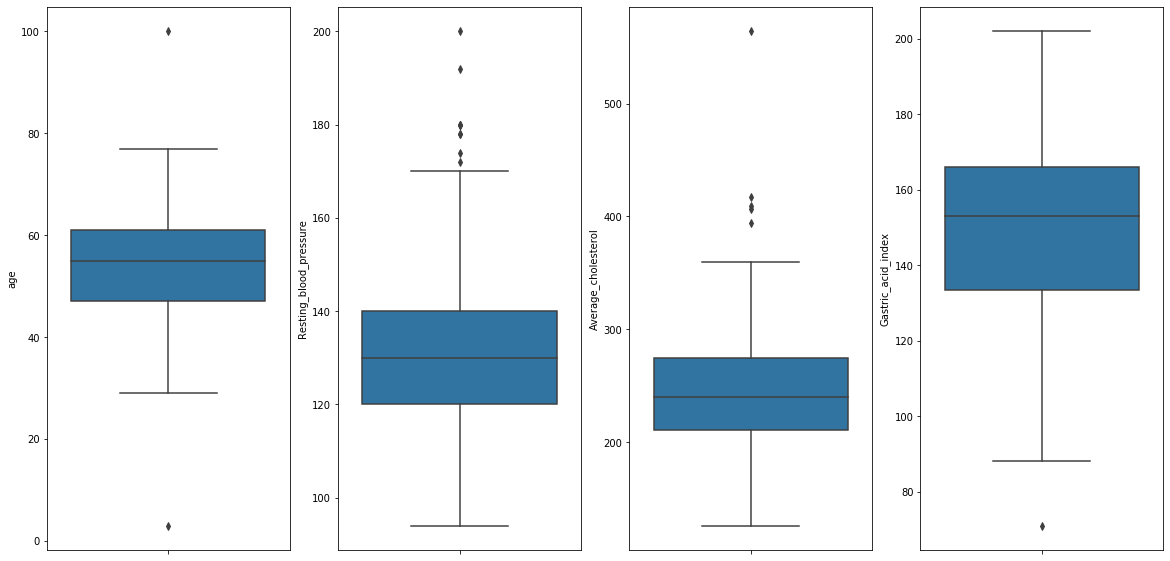

In [63]:
fig, ax = plt.subplots(1,4, figsize=(20,10))
sns.boxplot(y=cholera.age, ax=ax[0])
sns.boxplot(y=cholera.Resting_blood_pressure, ax=ax[1])
sns.boxplot(y=cholera.Average_cholesterol, ax=ax[2])
sns.boxplot(y=cholera.Gastric_acid_index, ax=ax[3])
plt.show()

In [71]:
# cholera.loc[cholera.Average_cholesterol > 390]
# cholera.loc[cholera.Gastric_acid_index < 80]
# cholera.loc[cholera.Resting_blood_pressure > 180]
# cholera.loc[cholera.age >80]

In [87]:
#cholera.loc[cholera.Cholera_test_result == True]

In [78]:
cholera.groupby('Cholera_test_result').count()

,age,sex,Dehydration_level,Resting_blood_pressure,Average_cholesterol,Presence_of_seizures,Vomit_color,Gastric_acid_index,Blood_type_0,Feces_consistency,Exposure_to,Presence_of_fever
Cholera_test_result,,,,,,,,,,,,
False,138,138,138,138,136,138,138,138,138,138,138,138
True,165,165,165,165,162,165,165,165,165,165,165,165


In [92]:
A = ['sex', 'Dehydration_level', 'Presence_of_seizures', 'Vomit_color', 'Blood_type_0', 'Feces_consistency',
       'Exposure_to', 'Presence_of_fever', 'Cholera_test_result']

for i in A:
    print(cholera[i].unique())

['Male' 'Female']
['Severe' 'High' 'Moderate' 'Mild']
[ True False]
['Normal' 'Abnormal' 'Clear']
[False  True]
['Normal' 'Rice Water' 'Watery']
['No exposure' 'Untreated water' 'Raw food' 'Bad hygiene' 4]
[False  True]
[ True False]


In [94]:
exposure_wrong_values = cholera.loc[cholera["Exposure_to"] == 4].copy()

In [95]:
cholera.drop(exposure_wrong_values.index, inplace = True)

In [96]:
A = ['sex', 'Dehydration_level', 'Presence_of_seizures', 'Vomit_color', 'Blood_type_0', 'Feces_consistency',
       'Exposure_to', 'Presence_of_fever', 'Cholera_test_result']

for i in A:
    print(cholera[i].unique())

['Male' 'Female']
['Severe' 'High' 'Moderate' 'Mild']
[ True False]
['Normal' 'Abnormal' 'Clear']
[False  True]
['Normal' 'Rice Water' 'Watery']
['No exposure' 'Untreated water' 'Raw food' 'Bad hygiene']
[False  True]
[ True False]


In [97]:
cholera.describe()

,age,Resting_blood_pressure,Average_cholesterol,Gastric_acid_index
count,298.000000,298.000000,293.000000,298.000000
mean,54.426174,131.580537,246.716724,149.466443
std,9.839260,17.669293,52.191871,22.983830
min,3.000000,94.000000,126.000000,71.000000
25%,48.000000,120.000000,211.000000,133.000000
50%,55.500000,130.000000,240.000000,152.500000
75%,61.000000,140.000000,275.000000,165.750000
max,100.000000,200.000000,564.000000,202.000000


In [99]:
cholera.to_csv("./data/cholera-clean.csv")